In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("supermarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df["Date"]=pd.to_datetime(df["Date"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

# Which city has the highest average sales per transaction?

In [7]:
average_sale_per_transaction=df.groupby("City")["Total"].mean().sort_values(ascending=False)
average_sale_per_transaction

City
Naypyitaw    337.099715
Mandalay     319.872506
Yangon       312.354031
Name: Total, dtype: float64

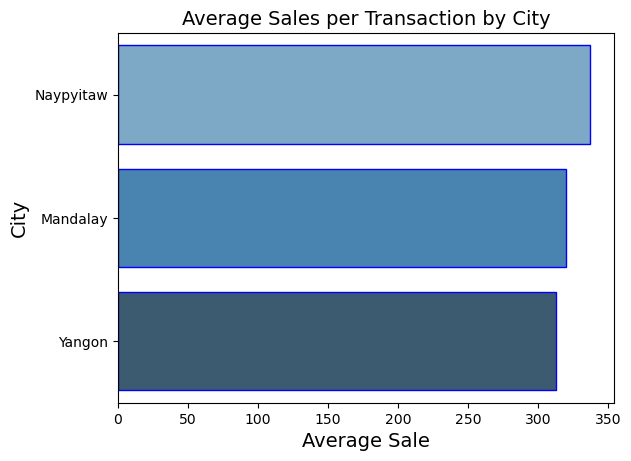

In [8]:
sns.barplot(x=average_sale_per_transaction.values,
            y=average_sale_per_transaction.index,
            palette="Blues_d",edgecolor="b")

plt.title("Average Sales per Transaction by City", fontsize=14)
plt.xlabel("Average Sale",fontsize=14)
plt.ylabel("City",fontsize=14)
plt.show()

# How does the average customer rating differ between branches?

In [9]:
average_customer_rating=df.groupby("Branch")["Rating"].mean().reset_index()
average_customer_rating

,Branch,Rating
0,A,7.027059
1,B,6.818072
2,C,7.072866


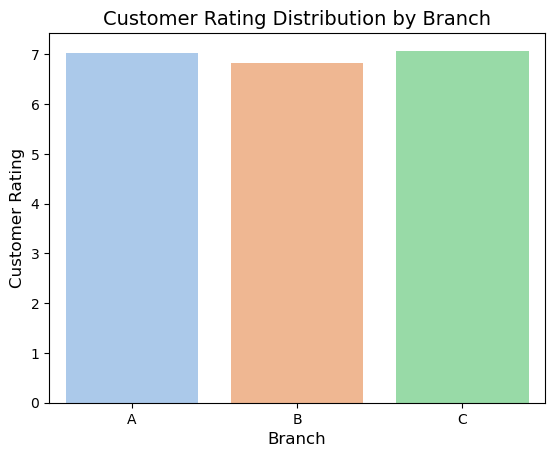

In [10]:
sns.barplot(
    data=average_customer_rating,
    x="Branch",
    y="Rating",
    palette="pastel"
)

# Add titles and labels
plt.title("Customer Rating Distribution by Branch", fontsize=14)
plt.xlabel("Branch", fontsize=12)
plt.ylabel("Customer Rating", fontsize=12)

plt.show()

# What is the sales distribution across different branches?

In [11]:
sale_distribution_branches=df.groupby("Branch")["Total"].sum().reset_index()
sale_distribution_branches

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


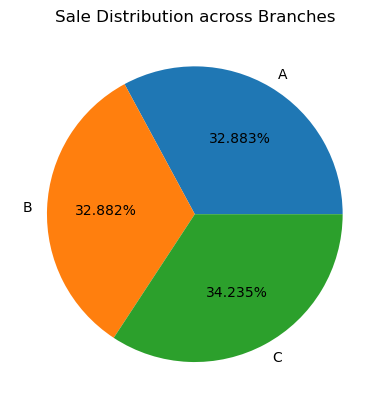

In [12]:
Branch=["A","B","C"]
plt.pie(sale_distribution_branches["Total"],labels=Branch,autopct="%0.3f%%")
plt.title("Sale Distribution across Branches")
plt.show()

# What are the busiest times of the day for each branch?

In [13]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].dt.hour

In [14]:
hourly_transactions = df.groupby(['Branch', 'Hour']).size().reset_index(name='Transactions')

C:\Users\A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


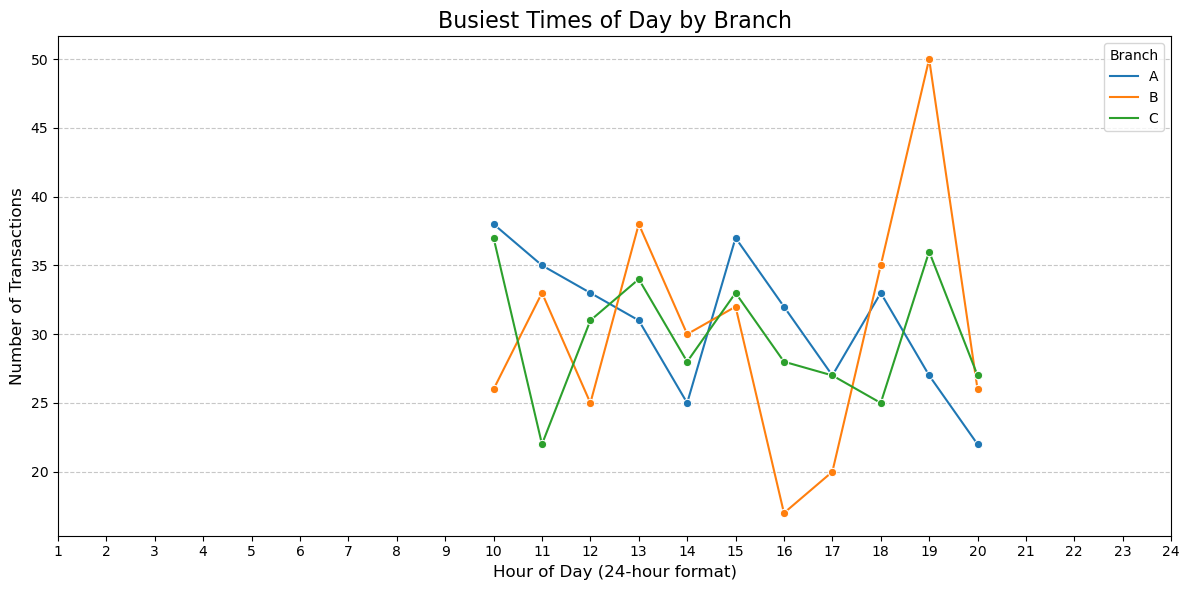

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_transactions, x='Hour', y='Transactions', hue='Branch', marker='o')
plt.title('Busiest Times of Day by Branch', fontsize=16)
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(title='Branch', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, 25))
plt.tight_layout()
plt.show()

# How do sales vary by day of the week?

In [16]:
# Convert Date to datetime format and extract the day of the week
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Map day numbers to day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayName'] = df['DayOfWeek'].apply(lambda x: days[x])

sales_by_day=df.groupby("DayName")["Total"].mean().reset_index()

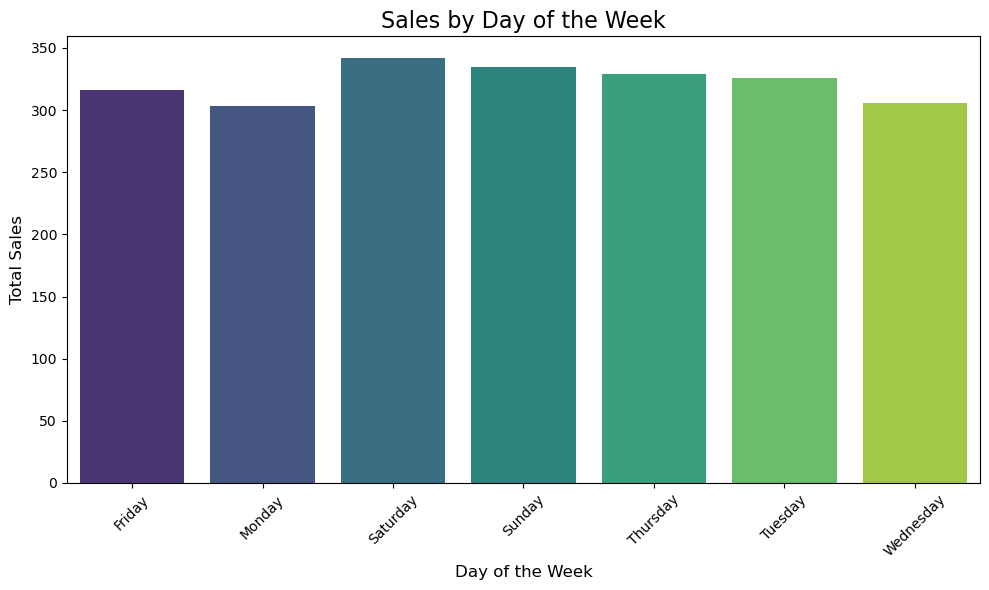

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_day, x='DayName', y='Total', palette='viridis')
plt.title('Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# What is the monthly trend in total sales and number of transactions?

In [18]:
df["Months"] = df["Date"].dt.month

In [19]:
import calendar
df["MonthsName"]=df["Months"].apply(lambda x:calendar.month_name[x])
monthly_total_sale=df.groupby("MonthsName")["Total"].sum().reset_index()


In [20]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Hour,DayOfWeek,DayName,Months,MonthsName
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,13,5,Saturday,1,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,10,4,Friday,3,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,13,6,Sunday,3,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,20,6,Sunday,1,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,10,4,Friday,2,February


C:\Users\A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


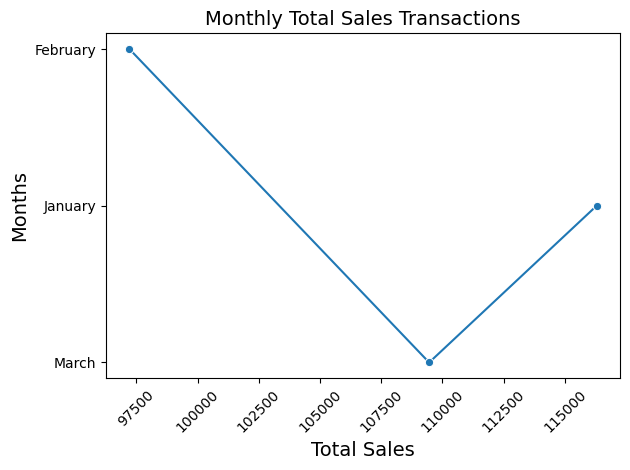

In [21]:
sns.lineplot(data=monthly_total_sale, x="Total", y="MonthsName", marker='o')
plt.title("Monthly Total Sales Transactions", fontsize=14)
plt.xlabel("Total Sales", fontsize=14)
plt.ylabel("Months", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# what is the average spending amount for members vs normal customers

In [22]:
# Calculate the average spending by customer type
average_spending = df.groupby('Customer type')['Total'].mean().reset_index()

# Rename columns for clarity
average_spending.columns = ['Customer Type', 'Average Spending']
average_spending


,Customer Type,Average Spending
0,Member,327.791305
1,Normal,318.122856


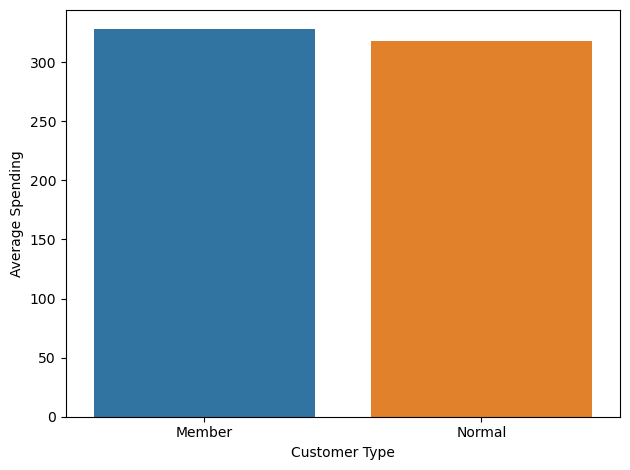

In [23]:
sns.barplot(data=average_spending,x="Customer Type",y="Average Spending")
plt.tight_layout()
plt.show()

# which product line is more popular among male and female

In [24]:
# Group by Gender and Product line, and count transactions
product_popularity = df.groupby(['Gender', 'Product line']).size().reset_index(name='Count')

product_popularity


,Gender,Product line,Count
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79
5,Female,Sports and travel,88
6,Male,Electronic accessories,86
7,Male,Fashion accessories,82
8,Male,Food and beverages,84
9,Male,Health and beauty,88


In [25]:
# Identify the most popular product line for each gender
popular_products = product_popularity.loc[product_popularity.groupby('Gender')['Count'].idxmax()]
popular_products

,Gender,Product line,Count
1,Female,Fashion accessories,96
9,Male,Health and beauty,88


# Do Members Provides Higher Rating Compared to normal customers

In [26]:
members_and_normal_customers_rating=df.groupby("Customer type")["Rating"].mean().reset_index()
members_and_normal_customers_rating

,Customer type,Rating
0,Member,6.940319
1,Normal,7.005210


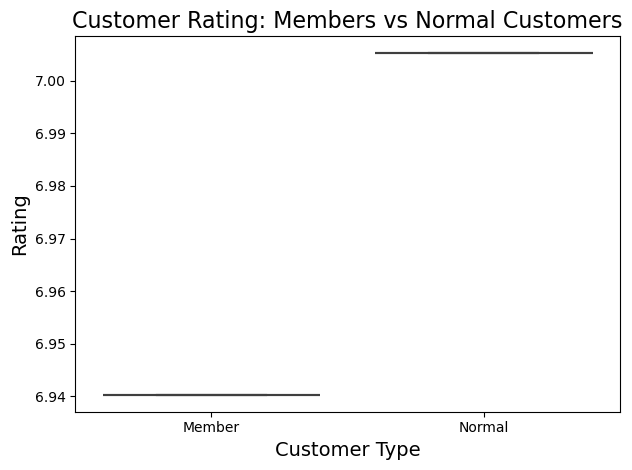

In [27]:
sns.boxplot(data=members_and_normal_customers_rating,x="Customer type",y="Rating")
# sns.boxplot(data=df, x='Customer type', y='Rating', palette='Set2')

# Add plot titles and labels
plt.title('Customer Rating: Members vs Normal Customers', fontsize=16)
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

# what is the revenue distribution by product line

In [28]:
# Calculate total revenue by product line
revenue_distribution = df.groupby('Product line')['Total'].sum().reset_index()
revenue_distribution

,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


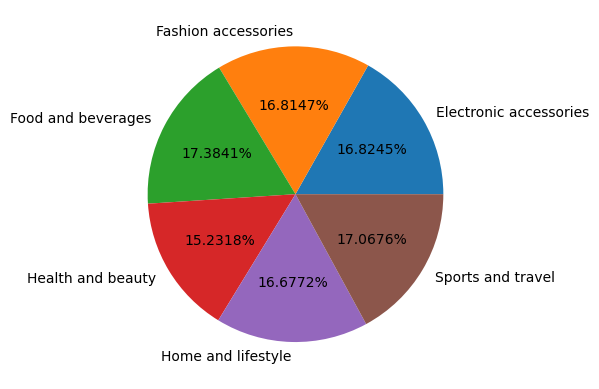

In [29]:
labels=["Electronic accessories","Fashion accessories","Food and beverages","Health and beauty","Home and lifestyle","Sports and travel"]
plt.pie(revenue_distribution["Total"],labels=labels,autopct="%0.4f%%")
plt.show()

# Which Product lines have the highest average gross income

In [30]:
highest_ave_gross_income_pro_lines=df.groupby("Product line")["gross income"].mean().reset_index()
highest_ave_gross_income_pro_lines

,Product line,gross income
0,Electronic accessories,15.220597
1,Fashion accessories,14.528062
2,Food and beverages,15.365310
3,Health and beauty,15.411572
4,Home and lifestyle,16.030331
5,Sports and travel,15.812630


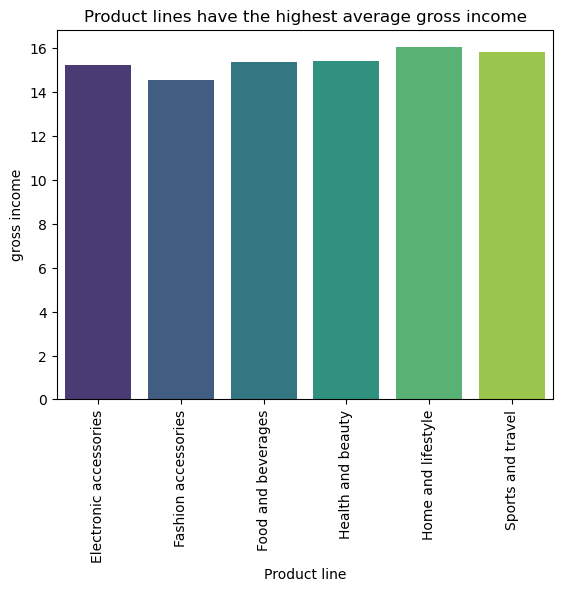

In [31]:
sns.barplot(data=highest_ave_gross_income_pro_lines,x="Product line",y="gross income",palette='viridis')
plt.title("Product lines have the highest average gross income")
plt.xticks(rotation=90)
plt.show()

# what is the relation ship between the unit price and gross income

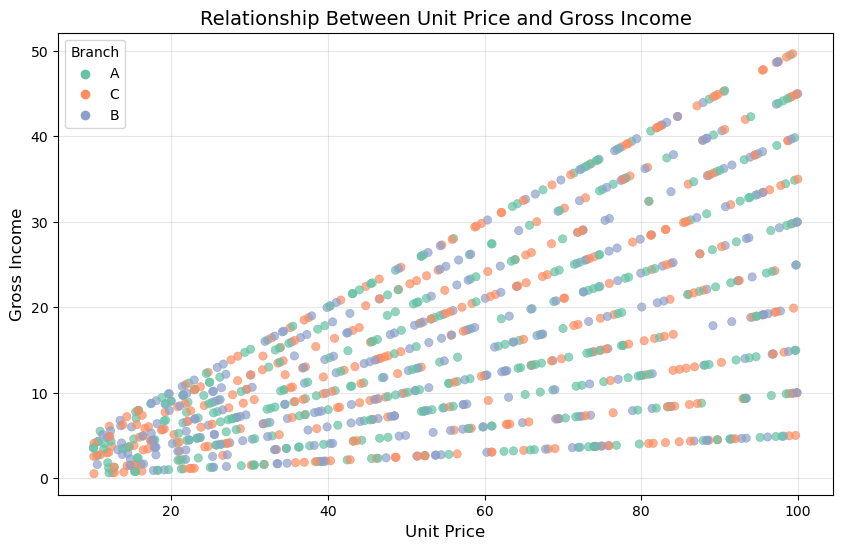

In [33]:
# Create a scatter plot to visualize the relationship between unit price and gross income
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Unit price',
    y='gross income',
    hue='Branch',  # Add branch differentiation for additional insight
    palette='Set2',
    alpha=0.7,
    edgecolor=None
)

# Add titles and labels
plt.title('Relationship Between Unit Price and Gross Income', fontsize=14)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Gross Income', fontsize=12)
plt.legend(title='Branch', fontsize=10)
plt.grid(alpha=0.3)

plt.show()


# Which payment Method Genrate the Highest revenue

In [34]:
highest_revenue_of_payment_method=df.groupby("Payment")["Total"].sum().reset_index()
highest_revenue_of_payment_method

,Payment,Total
0,Cash,112206.570
1,Credit card,100767.072
2,Ewallet,109993.107


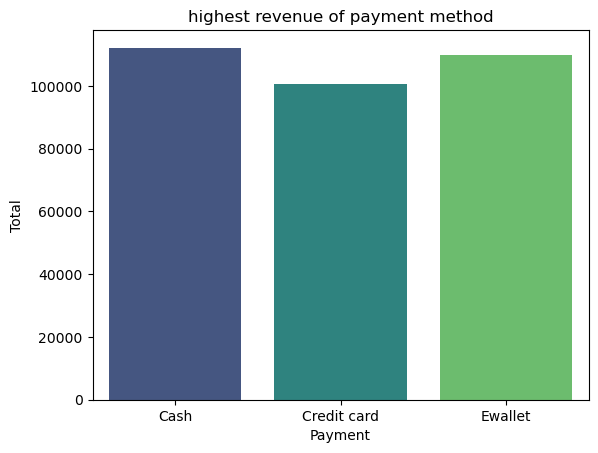

In [35]:
sns.barplot(data=highest_revenue_of_payment_method,
           x="Payment",y="Total",palette="viridis")
plt.title("highest revenue of payment method")
plt.show()

# Do Payment Prefrencess Vary by Gender

In [36]:
payment_prefrencess_by_gender=df.groupby(["Gender","Payment"]).size().reset_index(name="Count")
payment_prefrencess_by_gender

,Gender,Payment,Count
0,Female,Cash,178
1,Female,Credit card,163
2,Female,Ewallet,160
3,Male,Cash,166
4,Male,Credit card,148
5,Male,Ewallet,185


In [37]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Hour,DayOfWeek,DayName,Months,MonthsName
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,13,5,Saturday,1,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,10,4,Friday,3,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,13,6,Sunday,3,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,20,6,Sunday,1,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,10,4,Friday,2,February


# Is there a trend between the total sale amount and customer rating

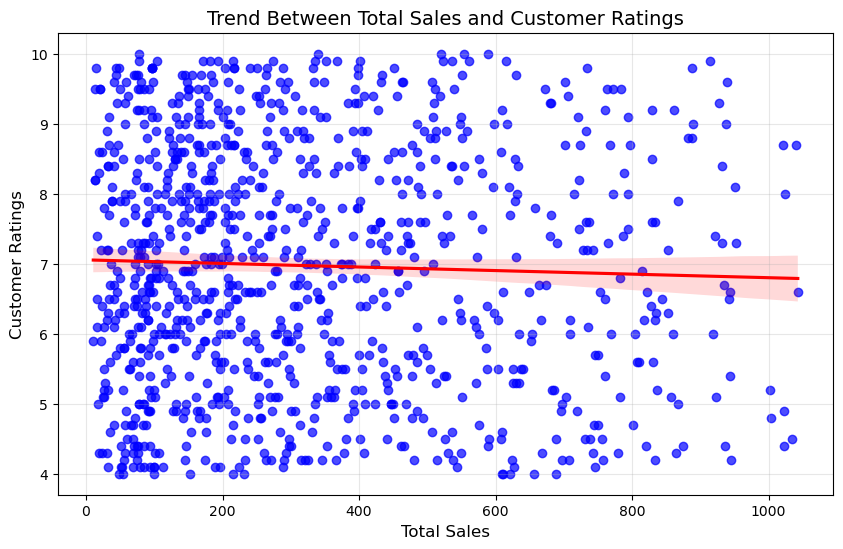

In [39]:
# Create a scatter plot with a trend line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Total',
    y='Rating',
    scatter_kws={'alpha': 0.7, 'color': 'blue'},
    line_kws={'color': 'red'}
)

# Add titles and labels
plt.title('Trend Between Total Sales and Customer Ratings', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Customer Ratings', fontsize=12)
plt.grid(alpha=0.3)

plt.show()


# What is the distribution of customer rating

In [40]:
customer_rating_distribution=df.groupby("Customer type")["Rating"].sum().reset_index()
customer_rating_distribution

,Customer type,Rating
0,Member,3477.1
1,Normal,3495.6


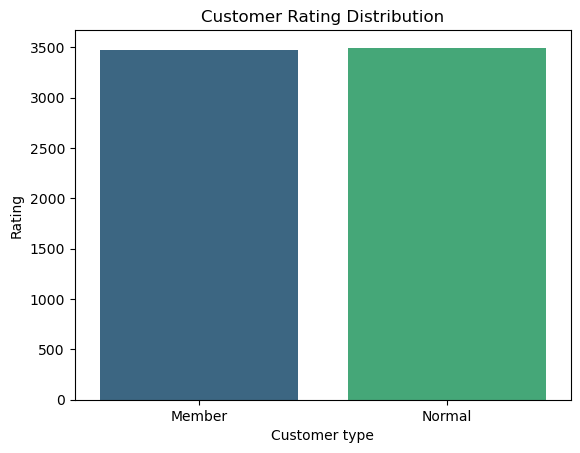

In [41]:
sns.barplot(data=customer_rating_distribution,
           x="Customer type",y="Rating",palette="viridis")
plt.title("Customer Rating Distribution")
plt.show()

# How does the gross income correlated with quantity income

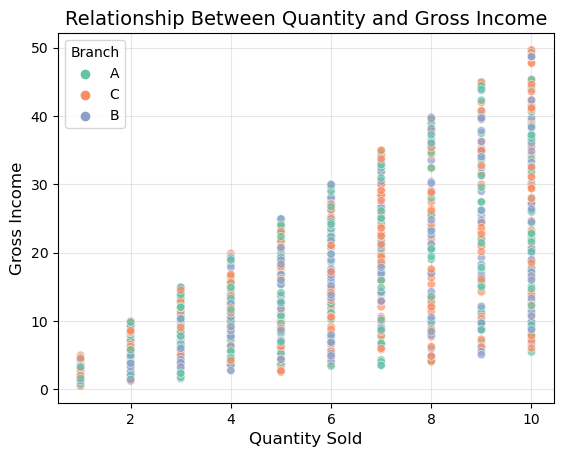

In [43]:
sns.scatterplot(
    data=df,
    x='Quantity',
    y='gross income',
    hue='Branch',  # Differentiate by branch for more insight
    palette='Set2',
    alpha=0.7
)

# Add titles and labels
plt.title('Relationship Between Quantity and Gross Income', fontsize=14)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Gross Income', fontsize=12)
plt.legend(title='Branch', fontsize=10)
plt.grid(alpha=0.3)

plt.show()

In [44]:
revenue_by_branch_product = df.groupby(['Branch', 'Product line'])['Total'].sum().unstack()
revenue_by_branch_product

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995
B,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
C,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280


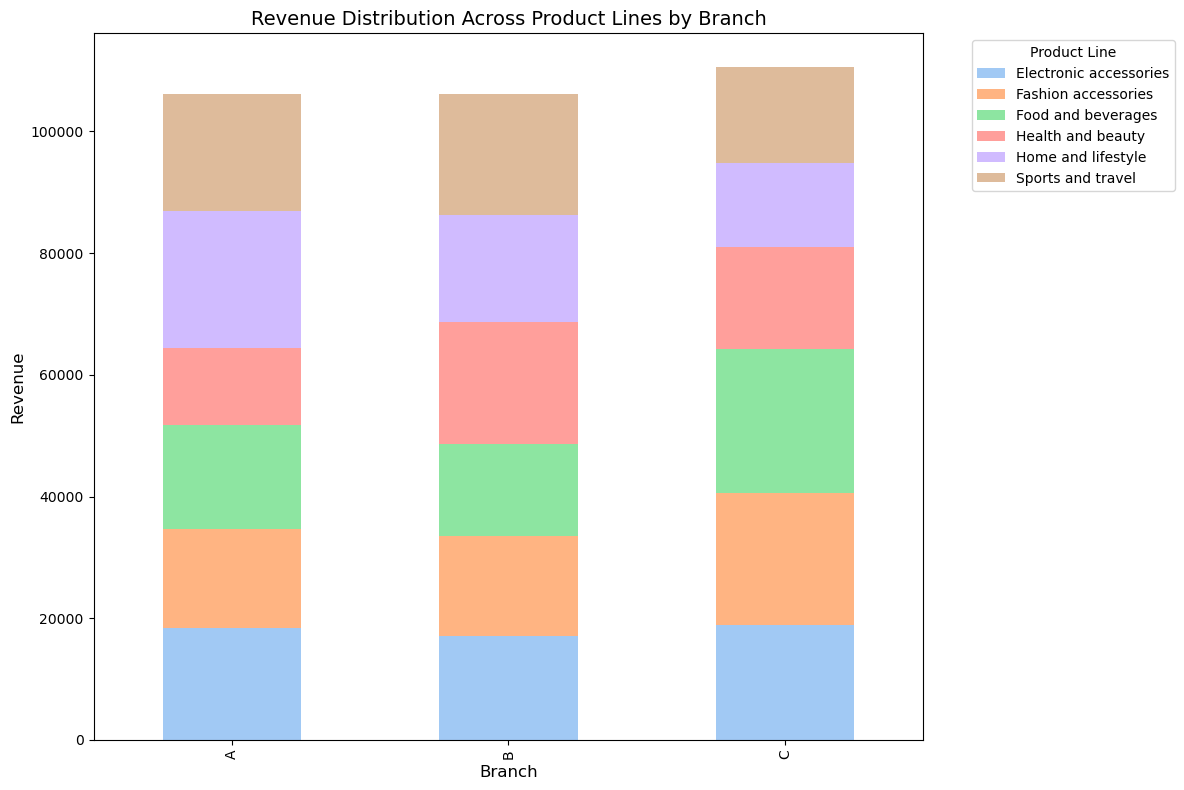

In [45]:
revenue_by_branch_product.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=sns.color_palette('pastel')
)

# Add titles and labels
plt.title('Revenue Distribution Across Product Lines by Branch', fontsize=14)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [46]:
tax_contribution = df.groupby(['Branch', 'City'])['Tax 5%'].sum().reset_index()
tax_contribution

,Branch,City,Tax 5%
0,A,Yangon,5057.1605
1,B,Mandalay,5057.0320
2,C,Naypyitaw,5265.1765


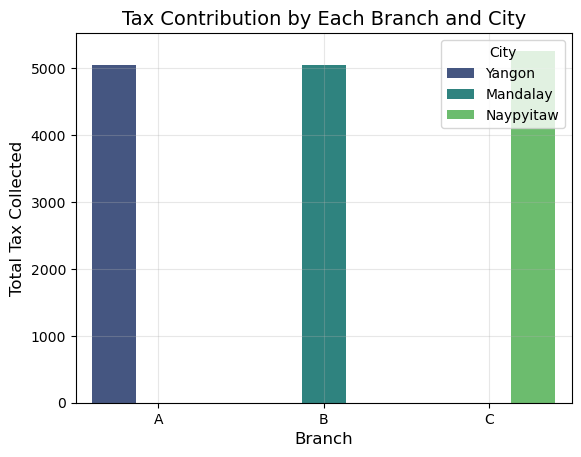

In [49]:
sns.barplot(
    data=tax_contribution,
    x='Branch',
    y='Tax 5%',
    hue='City',
    palette='viridis'
)

# Add titles and labels
plt.title('Tax Contribution by Each Branch and City', fontsize=14)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Total Tax Collected', fontsize=12)
plt.legend(title='City', fontsize=10)
plt.grid(alpha=0.3)

plt.show()

In [55]:
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

# Group by hour and calculate average spending
average_spending_by_hour = df.groupby('Hour')['Total'].mean().reset_index()
average_spending_by_hour.columns = ['Hour', 'Average Spending']

average_spending_by_hour

,Hour,Average Spending
0,10,311.103772
1,11,337.525883
2,12,292.875084
3,13,337.118709
4,14,371.426494
5,15,305.681456
6,16,327.614591
7,17,330.340784
8,18,279.896129
9,19,351.323124


C:\Users\A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


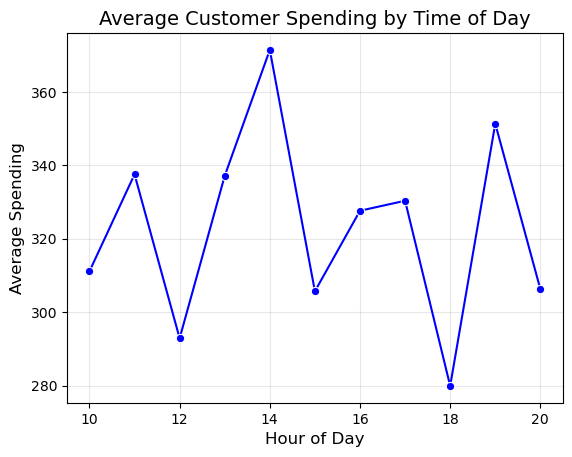

In [56]:
sns.lineplot(
    data=average_spending_by_hour,
    x='Hour',
    y='Average Spending',
    marker='o',
    color='blue'
)

# Add titles and labels
plt.title('Average Customer Spending by Time of Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.grid(alpha=0.3)

plt.show()